In [1]:
import pandas as pd
file = 'Bakery.csv'
bakery_data = pd.read_csv(file)
bakery_data

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [2]:
# Converting the DateTime column to datetime format and extracting the date
bakery_data['DateTime'] = pd.to_datetime(bakery_data['DateTime'])
bakery_data['Date'] = bakery_data['DateTime'].dt.date

# Aggregating data as per the requirements

# Daily transaction count
daily_transaction_count = bakery_data.groupby('Date')['TransactionNo'].nunique()

# Daily total item count (assuming each row represents one item sold)
daily_item_count = bakery_data.groupby('Date')['Items'].count()

# Convert DayType to numeric (weekday -> 0, weekend -> 1)
bakery_data['DayTypeNumeric'] = bakery_data['DayType'].apply(lambda x: 0 if x == 'Weekday' else 1)

# Daily DayType
daily_day_type = bakery_data.groupby('Date')['DayTypeNumeric'].first()

# Sales count by Daypart
sales_by_daypart = bakery_data.groupby(['Date', 'Daypart'])['Items'].count().unstack(fill_value=0)

# Sales count by Item
sales_by_item = bakery_data.groupby(['Date', 'Items'])['Items'].count().unstack(fill_value=0)

# Combining all the aggregated data into one dataframe
combined_data = pd.DataFrame({
    'DailyTransactionCount': daily_transaction_count,
    'DailyItemCount': daily_item_count,
    'DayType': daily_day_type
}).join(sales_by_daypart).join(sales_by_item)

combined_data

,DailyTransactionCount,DailyItemCount,DayType,Afternoon,Evening,Morning,Night,Adjustment,Afternoon with the baker,Alfajores,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,77,150,0,92,2,56,0,0,0,4,...,0,0,0,0,0,0,0,0,0,1
2016-01-12,47,83,0,50,2,31,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2016-02-11,83,164,0,74,11,79,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
2016-02-12,61,104,0,54,1,49,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2016-03-11,95,189,0,93,14,82,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-02,74,185,1,100,14,71,0,0,1,3,...,0,3,0,5,1,0,1,0,0,0
2017-11-03,80,203,1,103,16,84,0,0,0,0,...,0,2,2,4,1,0,0,1,0,0
2017-12-01,41,72,0,20,0,52,0,0,0,2,...,0,0,2,6,0,0,0,0,1,0


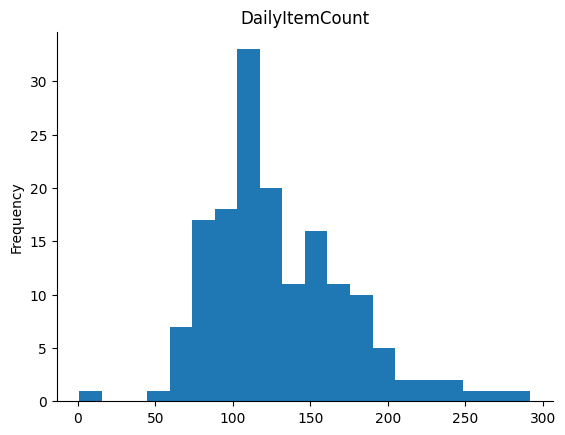

In [3]:
from matplotlib import pyplot as plt
combined_data['DailyItemCount'].plot(kind='hist', bins=20, title='DailyItemCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

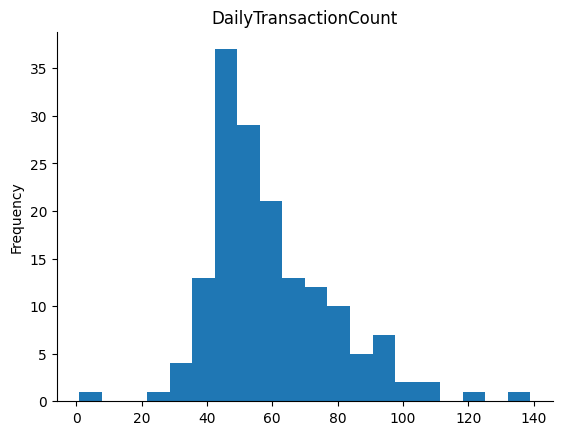

In [4]:
from matplotlib import pyplot as plt
combined_data['DailyTransactionCount'].plot(kind='hist', bins=20, title='DailyTransactionCount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
combined_data.describe()

,DailyTransactionCount,DailyItemCount,DayType,Afternoon,Evening,Morning,Night,Adjustment,Afternoon with the baker,Alfajores,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,59.528302,128.974843,0.289308,72.761006,3.270440,52.855346,0.088050,0.006289,0.276730,2.320755,...,0.006289,0.364780,0.918239,2.000000,1.213836,0.132075,0.081761,0.100629,0.339623,0.044025
std,19.048509,45.036406,0.454874,25.504891,6.401825,22.894319,0.687903,0.079305,0.778768,2.824667,...,0.079305,0.766559,1.739229,1.782474,1.544139,1.665408,0.476917,0.597410,0.933417,0.283422
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,99.000000,0.000000,54.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,118.000000,0.000000,70.000000,1.000000,47.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.500000,151.000000,1.000000,88.000000,5.000000,65.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,139.000000,292.000000,1.000000,161.000000,68.000000,150.000000,8.000000,1.000000,6.000000,14.000000,...,1.000000,4.000000,9.000000,7.000000,7.000000,21.000000,5.000000,7.000000,6.000000,3.000000


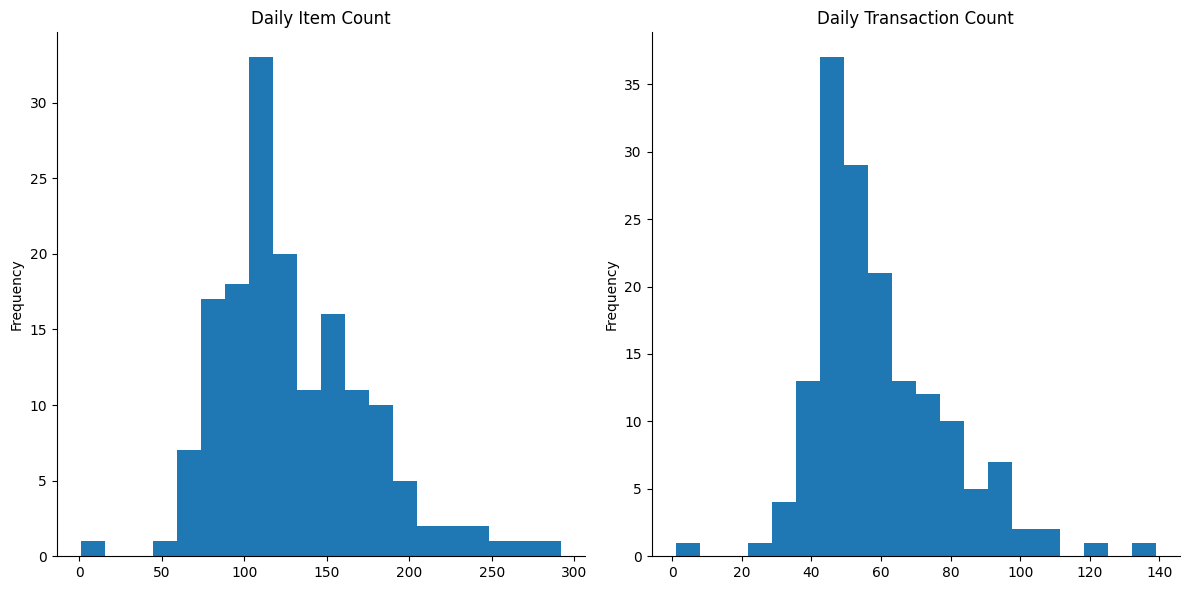

In [6]:
# Plotting histograms for Daily Item Count and Daily Transaction Count side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for Daily Item Count
combined_data['DailyItemCount'].plot(kind='hist', bins=20, title='Daily Item Count', ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)

# Histogram for Daily Transaction Count
combined_data['DailyTransactionCount'].plot(kind='hist', bins=20, title='Daily Transaction Count', ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

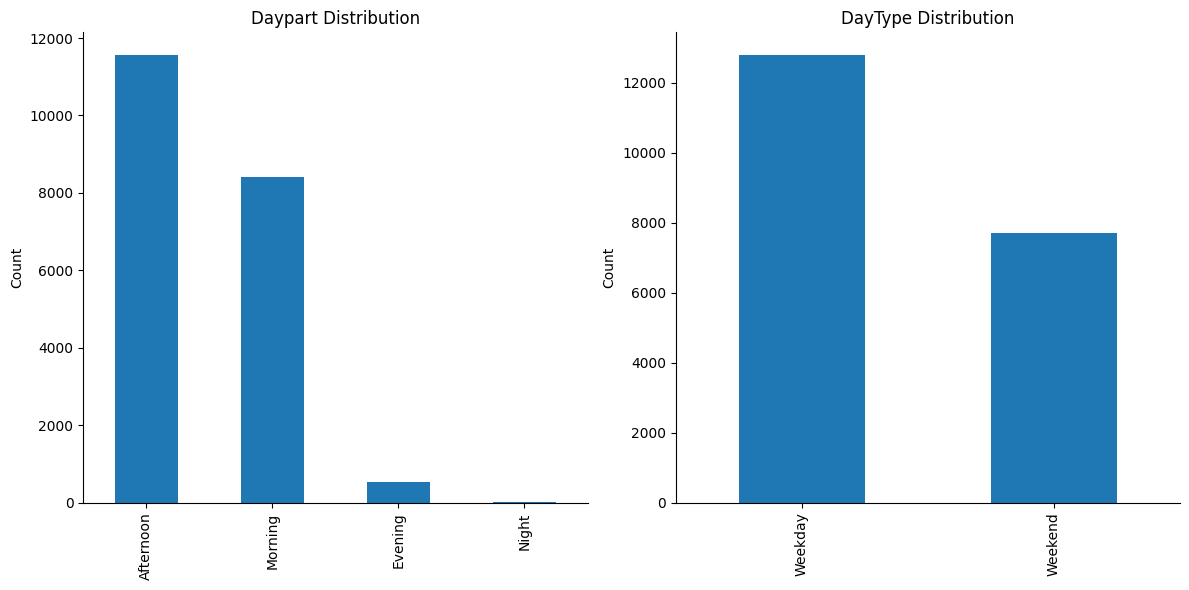

In [7]:
# Aggregate Daypart and DayType data for histograms
daypart_counts = bakery_data['Daypart'].value_counts()
daytype_counts = bakery_data['DayType'].value_counts()

# Plotting histograms for Daypart and DayType side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram for Daypart
daypart_counts.plot(kind='bar', title='Daypart Distribution', ax=axes[0])
axes[0].set_ylabel('Count')
axes[0].spines[['top', 'right']].set_visible(False)

# Histogram for DayType
daytype_counts.plot(kind='bar', title='DayType Distribution', ax=axes[1])
axes[1].set_ylabel('Count')
axes[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

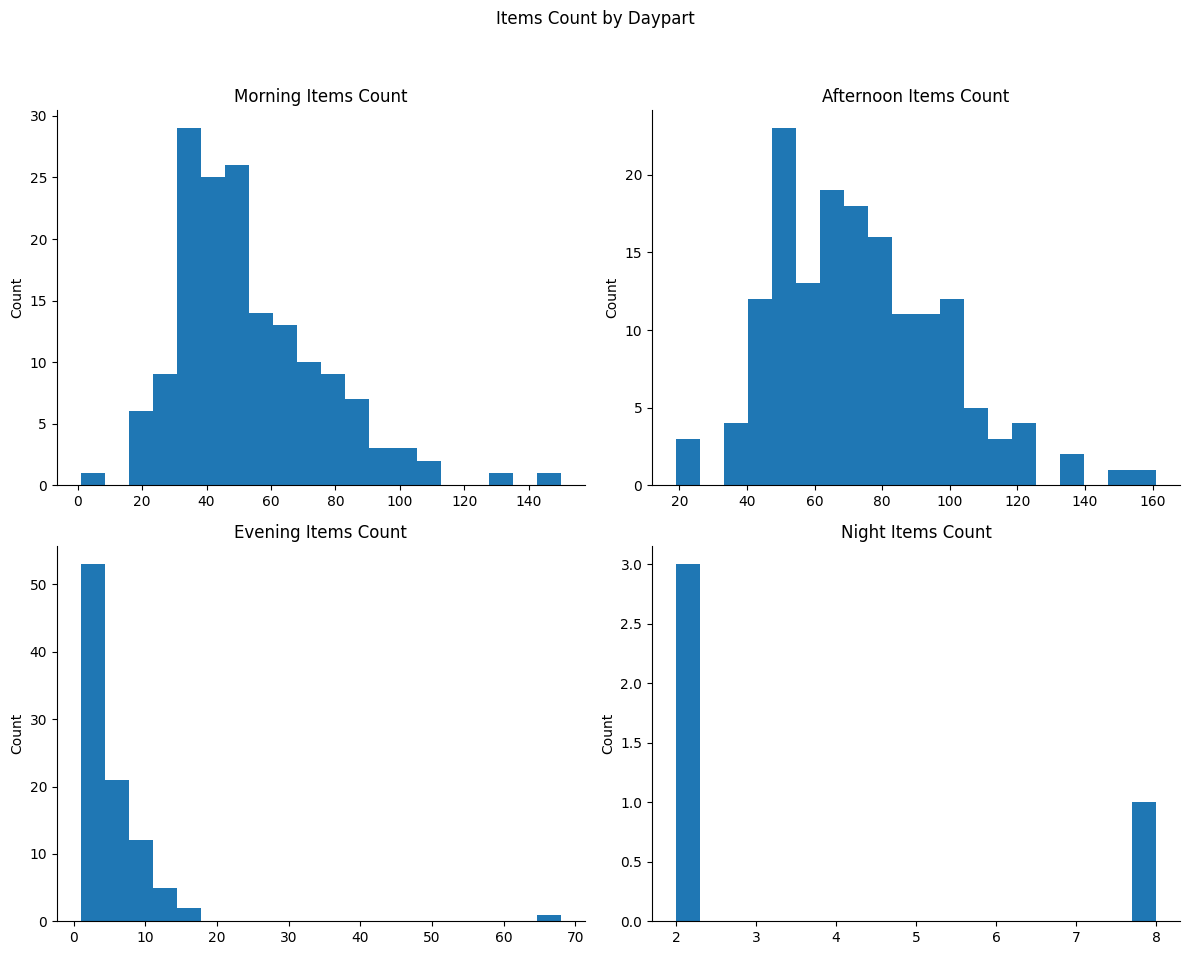

In [8]:
# Plotting histograms for item counts by each Daypart with the updated terminology
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Items Count by Daypart')

dayparts = ['Morning', 'Afternoon', 'Evening', 'Night']
for i, daypart in enumerate(dayparts):
    # Filter data for each daypart
    daypart_data = bakery_data[bakery_data['Daypart'] == daypart]

    # Count the number of items sold in each daypart
    daypart_item_count = daypart_data.groupby('Date')['Items'].count()

    # Plot histogram
    ax = axes[i//2, i%2]
    daypart_item_count.plot(kind='hist', bins=20, title=f'{daypart} Items Count', ax=ax)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

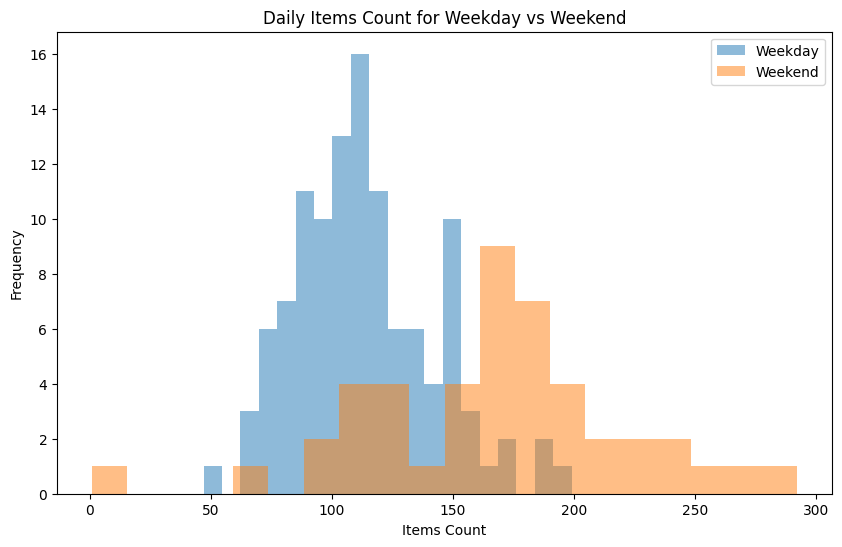

In [9]:
# Preparing the data for histograms of daily item counts for Weekday and Weekend

# Filter data for Weekday and Weekend
weekday_data = bakery_data[bakery_data['DayType'] == 'Weekday']
weekend_data = bakery_data[bakery_data['DayType'] == 'Weekend']

# Count the number of items sold each day for Weekday and Weekend
weekday_item_count = weekday_data.groupby('Date')['Items'].count()
weekend_item_count = weekend_data.groupby('Date')['Items'].count()

# Plotting the histograms overlaid
plt.figure(figsize=(10, 6))
plt.hist(weekday_item_count, bins=20, alpha=0.5, label='Weekday')
plt.hist(weekend_item_count, bins=20, alpha=0.5, label='Weekend')
plt.title('Daily Items Count for Weekday vs Weekend')
plt.xlabel('Items Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

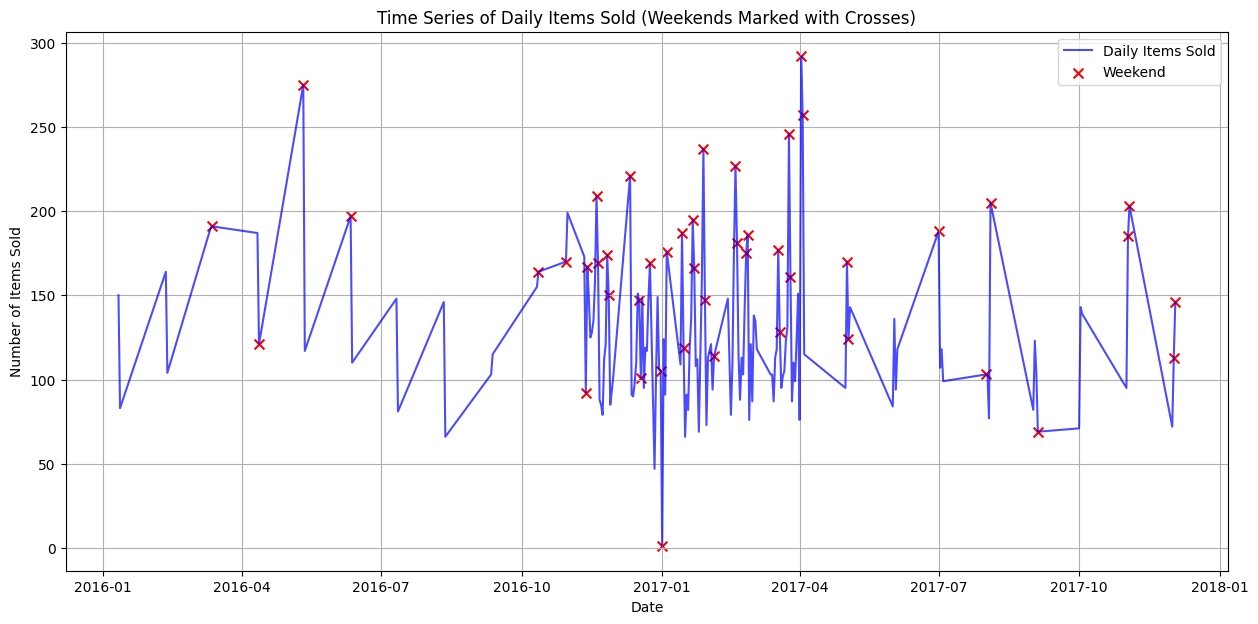

In [10]:
# First, group data by date and count the number of items sold each day
daily_sales = bakery_data.groupby('Date')['Items'].count()

# Identify which dates are weekends
weekend_dates = bakery_data[bakery_data['DayType'] == 'Weekend']['Date'].unique()

# Adding a legend entry for weekends using red crosses

# Plotting the time series line plot again
plt.figure(figsize=(15, 7))
plt.plot(daily_sales, label='Daily Items Sold', color='blue', alpha=0.7)

# Marking weekends with red crosses
for date, count in daily_sales.items():
    if date in weekend_dates:
        plt.scatter(date, count, color='red', marker='x', s=50)  # Using 'x' marker for weekends

# Adding legend entries
plt.legend(['Daily Items Sold', 'Weekend'])
plt.title('Time Series of Daily Items Sold (Weekends Marked with Crosses)')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.grid()
plt.show()

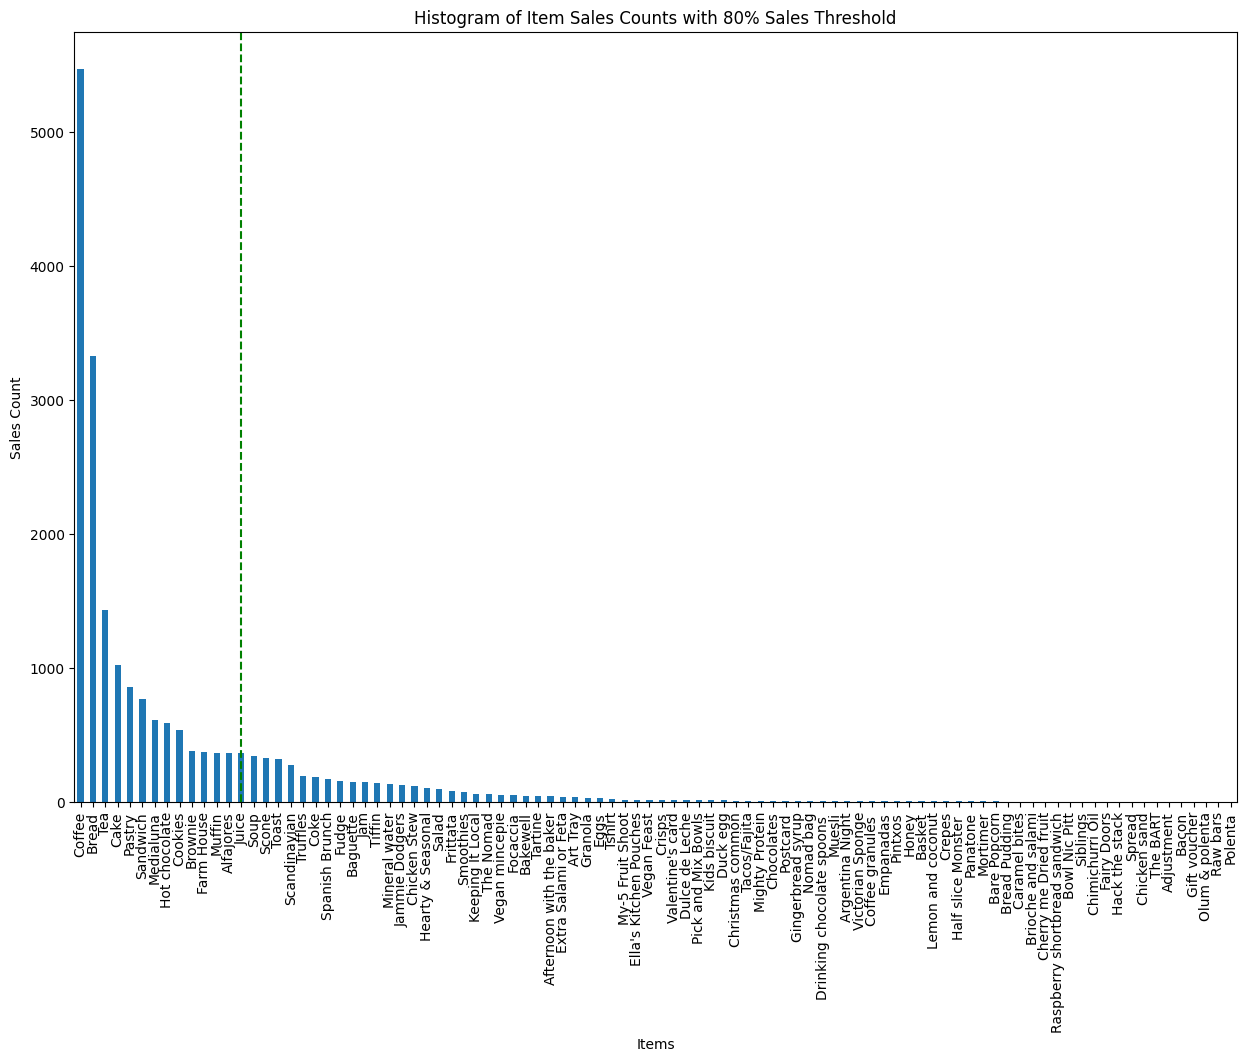

In [11]:
# Calculating the total number of each item sold and sorting them
item_sales_counts = bakery_data['Items'].value_counts().sort_values(ascending=False)

# Calculating the cumulative sales count and the 80% threshold
cumulative_sales = item_sales_counts.cumsum()
total_sales = cumulative_sales.iloc[-1]
eighty_percent_threshold = total_sales * 0.8

# Finding the item where the cumulative sales exceed 80% of the total sales
threshold_item = cumulative_sales[cumulative_sales > eighty_percent_threshold].index[0]

# Plotting the histogram of item sales counts
plt.figure(figsize=(15, 10))
item_sales_counts.plot(kind='bar')

# Marking the item where the cumulative sales exceed 80% of the total
threshold_item_position = list(item_sales_counts.index).index(threshold_item)
plt.axvline(x=threshold_item_position, color='green', linestyle='--')

plt.title('Histogram of Item Sales Counts with 80% Sales Threshold')
plt.xlabel('Items')
plt.ylabel('Sales Count')
plt.show()

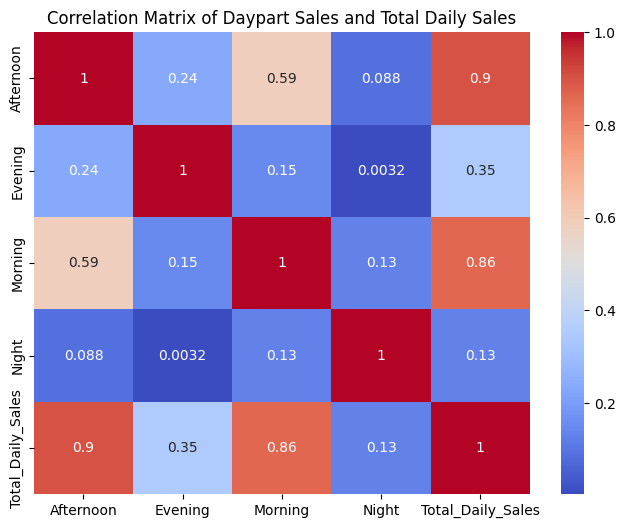

In [12]:
import seaborn as sns

# Counting the number of items sold in each daypart for each day
daypart_sales_counts = bakery_data.groupby(['Date', 'Daypart']).size().unstack(fill_value=0)

# Merging the daypart sales counts with the daily item count
combined_daypart_daily = daypart_sales_counts.join(daily_item_count.rename('Total_Daily_Sales'))

# Calculating the correlation matrix for the combined data
correlation_matrix_daypart_daily = combined_daypart_daily.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_daypart_daily, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daypart Sales and Total Daily Sales')
plt.show()

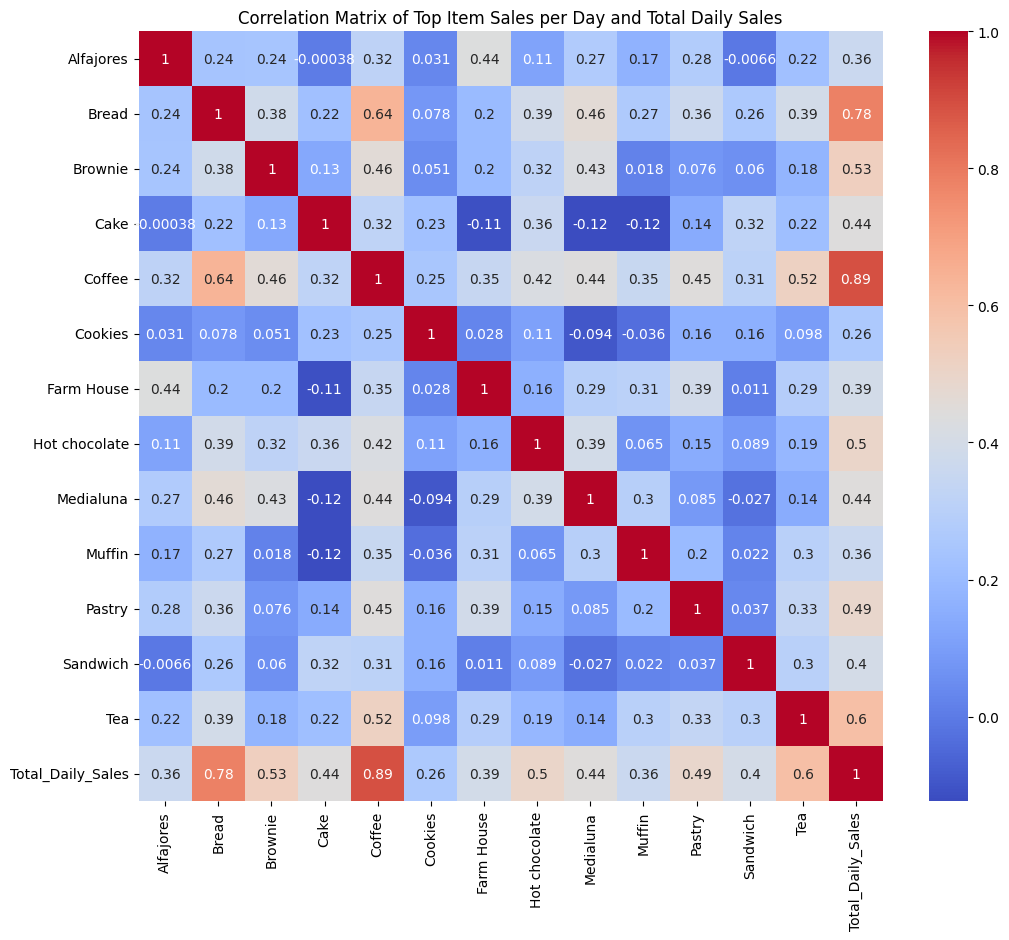

In [13]:
# Identifying the items that make up 80% of total sales
top_items = item_sales_counts.cumsum().sort_values(ascending=False)
top_items = top_items[top_items <= eighty_percent_threshold].index

# Filtering data for only the top items
filtered_data = bakery_data[bakery_data['Items'].isin(top_items)]

# Counting the number of each top item sold each day
daily_top_item_sales = filtered_data.groupby(['Date', 'Items']).size().unstack(fill_value=0)

# Merging the daily top item sales with the daily total sales
combined_top_items_daily = daily_top_item_sales.join(daily_item_count.rename('Total_Daily_Sales'))

# Calculating the correlation matrix for this data
correlation_matrix_top_items_daily = combined_top_items_daily.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_top_items_daily, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top Item Sales per Day and Total Daily Sales')
plt.show()

Filtering out the top items that make up 80% of the sales : ['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'Sandwich', 'Medialuna', 'Hot chocolate', 'Cookies', 'Brownie', 'Farm House', 'Muffin', 'Alfajores']


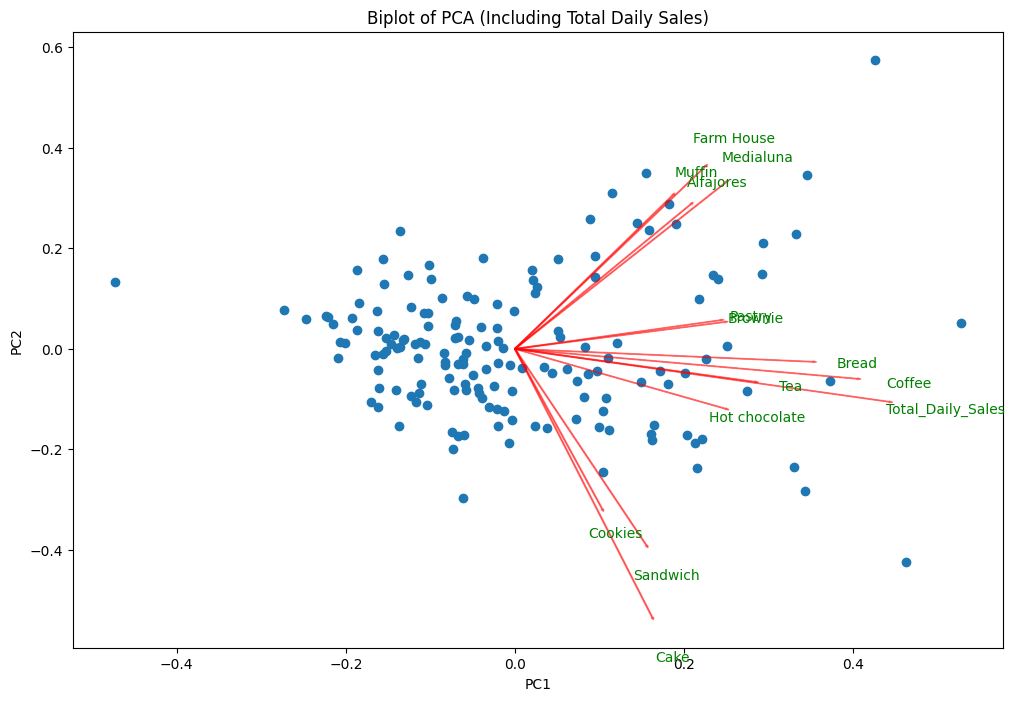

,Alfajores,Bread,Brownie,Cake,Coffee,Cookies,Farm House,Hot chocolate,Medialuna,Muffin,Pastry,Sandwich,Tea,Total_Daily_Sales,Explained Variance,Cumulative Explained Variance
0,0.208298,0.352351,0.247907,0.162546,0.404959,0.103407,0.225357,0.249203,0.249684,0.186858,0.243051,0.155750,0.283753,0.442609,0.342867,0.342867
1,0.288244,-0.025741,0.053369,-0.534727,-0.059540,-0.319229,0.363385,-0.119272,0.331714,0.306185,0.057001,-0.391552,-0.065550,-0.105369,0.129014,0.471882
2,-0.130322,0.130162,0.439370,0.045511,-0.009888,-0.205123,-0.259813,0.390403,0.417624,-0.240655,-0.407673,-0.140506,-0.300984,-0.003371,0.097521,0.569403
3,0.386969,-0.185149,0.187419,0.120157,-0.037688,0.430676,0.235629,0.135589,-0.115168,-0.460083,0.269709,-0.374155,-0.257813,-0.038229,0.075091,0.644494
4,-0.455814,0.077863,-0.289517,-0.022103,0.065103,0.375949,-0.149068,0.313686,0.103281,0.383145,0.214351,-0.455057,-0.158665,-0.001185,0.060353,0.704847
5,-0.006628,-0.059963,0.226809,-0.364077,0.085577,0.677518,0.004396,-0.288206,0.151150,0.145558,-0.382852,0.251133,-0.094711,0.016833,0.057590,0.762436
6,-0.227156,0.352115,0.327090,-0.214340,0.107136,-0.053640,-0.351303,-0.508949,-0.062685,-0.236950,0.412564,-0.196464,0.006368,0.075930,0.048606,0.811043


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Filtering out the top items that make up 80% of the sales
top_items = item_sales_counts[item_sales_counts.cumsum() <= eighty_percent_threshold].index
print('Filtering out the top items that make up 80% of the sales : {}'.format(list(top_items)))

# Selecting sales data for these top items
filtered_top_items_data = bakery_data[bakery_data['Items'].isin(top_items)]
daily_top_items_sales = filtered_top_items_data.groupby(['Date', 'Items']).size().unstack(fill_value=0)

# Adding the daily total sales to the daily top items sales data
daily_top_items_sales_with_total = daily_top_items_sales.join(daily_item_count.rename('Total_Daily_Sales'))

# Standardizing the combined data
scaler = StandardScaler()
standardized_combined_data = scaler.fit_transform(daily_top_items_sales_with_total.fillna(0))

# Applying PCA to the combined data
pca_combined = PCA(n_components=0.80)
principal_components_combined = pca_combined.fit_transform(standardized_combined_data)

# Number of components PCA chose
n_components_combined = pca_combined.n_components_

# Creating a DataFrame for the PCA components including the total daily sales
pca_components_combined_df = pd.DataFrame(pca_combined.components_, columns=daily_top_items_sales_with_total.columns)

# Calculating the explained variance for each principal component
explained_variance_combined = pca_combined.explained_variance_ratio_

# Calculating cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_combined)

# Re-applying PCA to the combined data (including the total daily sales)
pca_combined = PCA(n_components=0.80)
principal_components_combined = pca_combined.fit_transform(standardized_combined_data)

# Adding these values to the DataFrame
pca_components_combined_df['Explained Variance'] = explained_variance_combined
pca_components_combined_df['Cumulative Explained Variance'] = cumulative_explained_variance

# Plotting the biplot for the combined data
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

plt.figure(figsize=(12, 8))
biplot(principal_components_combined, np.transpose(pca_combined.components_[0:2, :]), labels=daily_top_items_sales_with_total.columns)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PCA (Including Total Daily Sales)')
plt.show()

pca_components_combined_df


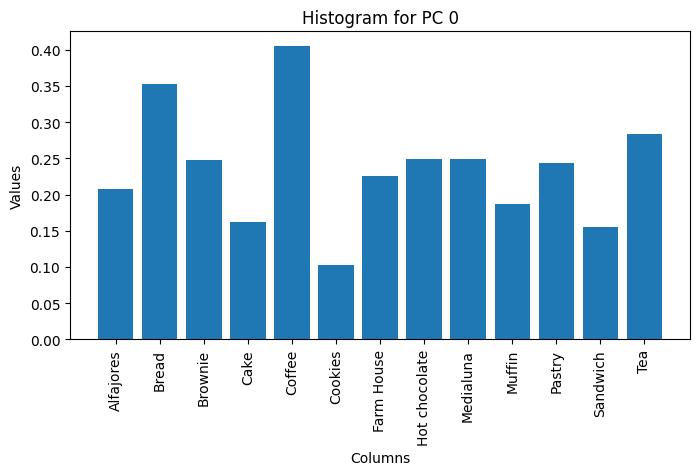

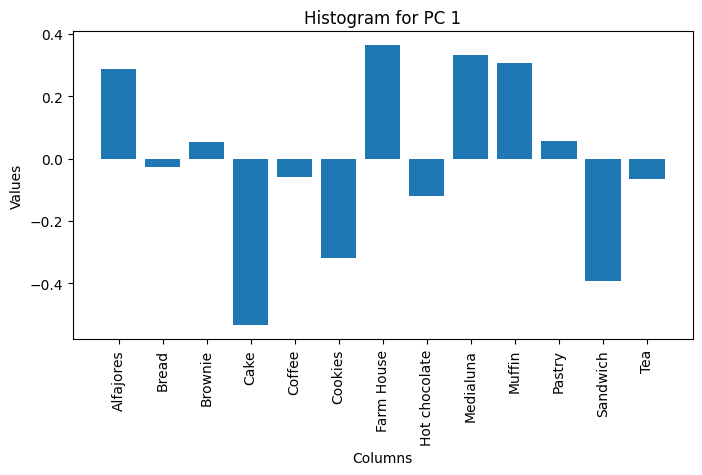

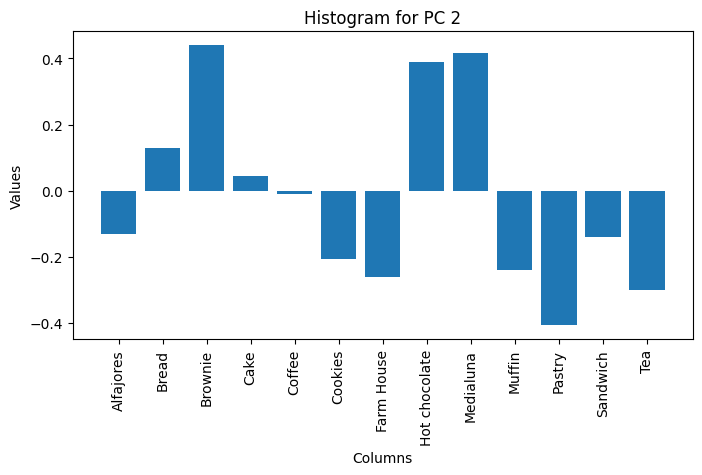

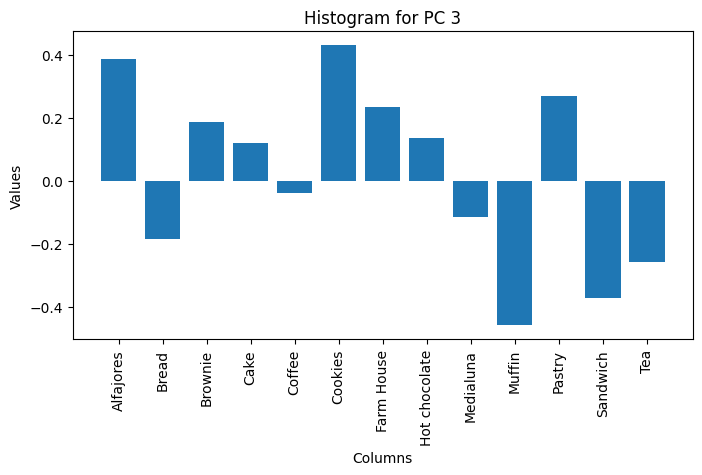

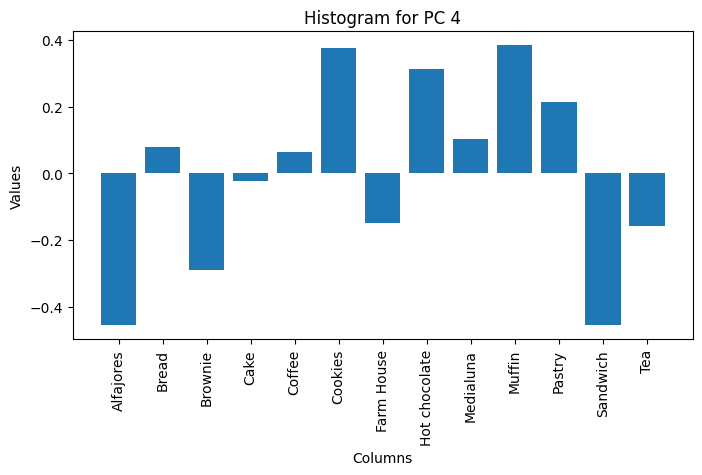

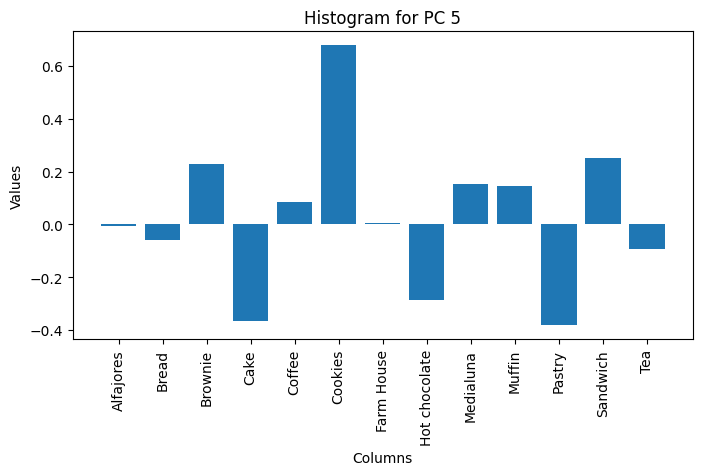

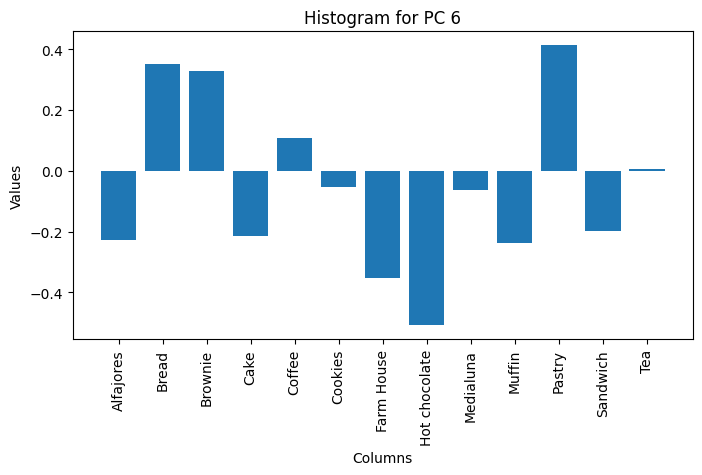

In [15]:
# Total_Daily_Sales、Explained Variance、Cumulative Explained Varianceの列を除外
data = pca_components_combined_df.drop(columns=['Total_Daily_Sales', 'Explained Variance', 'Cumulative Explained Variance'])

# 各行の要素をヒストグラムで表示
for index, row in data.iterrows():
    plt.figure(figsize=(8, 4))  # プロットのサイズを設定
    plt.xticks(rotation=90)  # x軸ラベルを縦に表示
    plt.bar(row.index, row.values)  # 棒グラフを作成
    plt.xlabel('Columns')  # x軸ラベル
    plt.ylabel('Values')  # y軸ラベル
    plt.title(f'Histogram for PC {index}')  # グラフのタイトル
    plt.show()  # グラフを表示

1. **PC0 - "総合的な販売トレンド"**: この主成分は、ほとんどの商品（特に「Coffee」や「Total_Daily_Sales」）に高い荷重を持っており、全体的な販売トレンドや人気商品の影響を捉えている可能性があります。

2. **PC1 - "スナック類の傾向"**: この成分は、「Cake」や「Cookies」などのスナック類に負の荷重を持ち、これらの商品の販売パターンを反映している可能性があります。

3. **PC2 - "朝食・軽食アイテムの影響"**: 「Brownie」、「Medialuna」、「Hot chocolate」などの朝食や軽食向け商品に高い荷重を持っていることから、これらの商品群の販売動向を示している可能性があります。

4. **PC3 - "特定アイテムの特異性"**: 特定の商品（例えば「Farm House」や「Sandwich」）に高い荷重を持つことから、これらの商品の特異な販売傾向を捉えている可能性があります。

5. **PC4 - "パン類の影響"**: 「Bread」に正の荷重を、「Pastry」や「Sandwich」に負の荷重を持っていることから、パン類の販売動向とその他の商品群との関連性を示しているかもしれません。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-c9b7412e3895>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xs[clusters == cluster] * scalex, ys[clusters == cluster] * scaley,


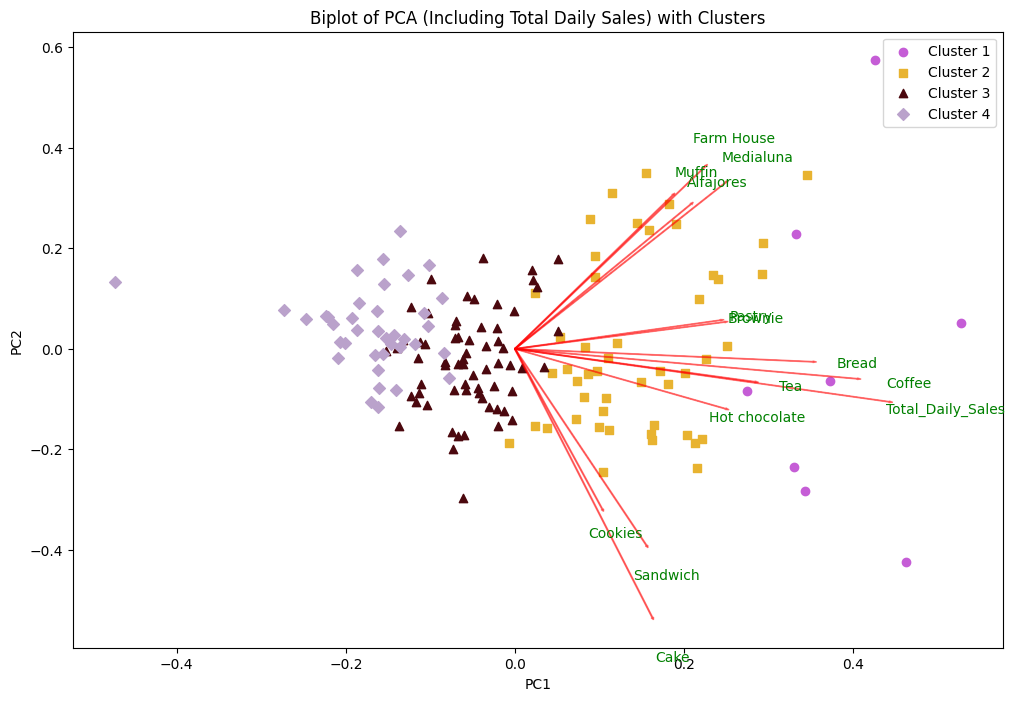

In [16]:
from sklearn.cluster import KMeans

# Clustering
# Number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(combined_top_items_daily)

# Creating a DataFrame for the PCA components
pca_df = pd.DataFrame(principal_components_combined, columns=[f'PC{i+1}' for i in range(n_components_combined)])
pca_df['Cluster'] = clusters

# Explained variance
explained_variance = pca_combined.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

def biplot_with_shapes_and_legend(score, coeff, clusters, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]  # Number of components
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    # Scatter plot with different shapes for each cluster
    shapes = ['o', 's', '^', 'D']  # Different shapes for each cluster
    for cluster in range(n_clusters):
        plt.scatter(xs[clusters == cluster] * scalex, ys[clusters == cluster] * scaley,
                    c=np.random.rand(3,), marker=shapes[cluster], label=f'Cluster {cluster + 1}')

    # Plotting arrows and labels for each principal component
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is not None and i < len(labels):
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    # Adding a legend
    plt.legend()

# Plotting the modified biplot
plt.figure(figsize=(12, 8))
biplot_with_shapes_and_legend(principal_components_combined, np.transpose(pca_combined.components_[0:2, :]), clusters, labels=daily_top_items_sales_with_total.columns)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PCA (Including Total Daily Sales) with Clusters')
plt.show()

In [17]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster
0,1.330951,-0.437704,-2.827071,0.693498,0.823521,-0.357428,1.435029,1
1,-1.726940,1.429469,-0.291093,-0.132736,0.424925,-1.307817,0.346657,3
2,1.979405,2.445845,-4.346236,3.183607,-0.856989,-0.346899,0.299485,1
3,-0.990053,-0.799540,0.342286,-1.086527,-0.730932,0.234650,-0.471261,2
4,4.013059,2.051030,-1.653122,3.337855,-1.100978,-0.036810,0.725849,1
...,...,...,...,...,...,...,...,...
154,2.907956,-1.830953,-0.513931,0.529220,0.528531,-2.288810,1.070421,1
155,2.951387,-2.308691,-0.463848,-1.912324,-0.776375,0.310357,-0.243826,1
156,-3.029876,0.626226,-0.380010,0.628256,-0.131416,0.027710,0.032303,3
157,-0.926372,-0.290179,0.622922,1.177686,0.213819,-0.634515,1.292193,2


In [18]:
combined_top_items_daily

,Alfajores,Bread,Brownie,Cake,Coffee,Cookies,Farm House,Hot chocolate,Medialuna,Muffin,Pastry,Sandwich,Tea,Total_Daily_Sales
Date,,,,,,,,,,,,,,
2016-01-11,4,21,0,6,38,7,1,2,2,3,14,3,19,150
2016-01-12,1,19,0,3,22,0,3,3,3,3,8,2,6,83
2016-02-11,10,17,0,0,42,6,10,1,0,1,16,2,14,164
2016-02-12,1,18,0,5,30,2,1,4,5,1,5,12,5,104
2016-03-11,9,26,8,6,40,6,10,3,9,0,18,6,9,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-02,3,36,3,16,38,4,1,7,3,0,12,3,19,185
2017-11-03,0,30,3,16,48,4,3,3,6,4,5,13,15,203
2017-12-01,2,11,0,3,23,3,2,1,0,0,2,0,8,72


In [19]:
pca_components_combined_df

,Alfajores,Bread,Brownie,Cake,Coffee,Cookies,Farm House,Hot chocolate,Medialuna,Muffin,Pastry,Sandwich,Tea,Total_Daily_Sales,Explained Variance,Cumulative Explained Variance
0,0.208298,0.352351,0.247907,0.162546,0.404959,0.103407,0.225357,0.249203,0.249684,0.186858,0.243051,0.155750,0.283753,0.442609,0.342867,0.342867
1,0.288244,-0.025741,0.053369,-0.534727,-0.059540,-0.319229,0.363385,-0.119272,0.331714,0.306185,0.057001,-0.391552,-0.065550,-0.105369,0.129014,0.471882
2,-0.130322,0.130162,0.439370,0.045511,-0.009888,-0.205123,-0.259813,0.390403,0.417624,-0.240655,-0.407673,-0.140506,-0.300984,-0.003371,0.097521,0.569403
3,0.386969,-0.185149,0.187419,0.120157,-0.037688,0.430676,0.235629,0.135589,-0.115168,-0.460083,0.269709,-0.374155,-0.257813,-0.038229,0.075091,0.644494
4,-0.455814,0.077863,-0.289517,-0.022103,0.065103,0.375949,-0.149068,0.313686,0.103281,0.383145,0.214351,-0.455057,-0.158665,-0.001185,0.060353,0.704847
5,-0.006628,-0.059963,0.226809,-0.364077,0.085577,0.677518,0.004396,-0.288206,0.151150,0.145558,-0.382852,0.251133,-0.094711,0.016833,0.057590,0.762436
6,-0.227156,0.352115,0.327090,-0.214340,0.107136,-0.053640,-0.351303,-0.508949,-0.062685,-0.236950,0.412564,-0.196464,0.006368,0.075930,0.048606,0.811043
